#A* Search on a Grid
In our previous implementation of A* Search, we built an algorithm that could navigate a map by translating it to a graph and finding the optimal path from the starting node to the goal node.

What if, instead of viewing each room in our map as a node, we chose to instead divide our map into a two-dimensional grid. Each cell on the grid can be located using an ordered pair, just like a cartesian plane. We can also change the dimensions of the cells to increase or decrease the granularity of the grid. We can use a simple numbering system to mark which spaces on the grid are traversable and which are blocked by an obstacle. Using these criteria, we can translate our map using the numpy and openCV libraries to process the image and convert it to an array.

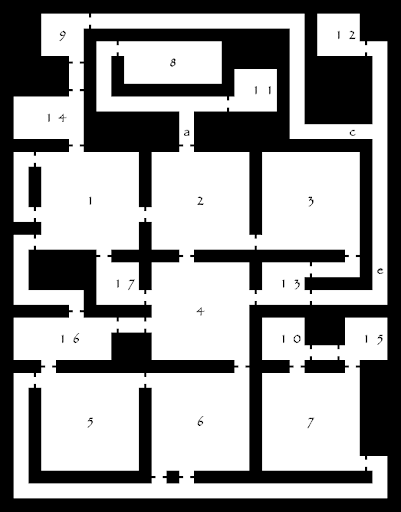

*Map generated by [Donjon](https://donjon.bin.sh/fantasy/dungeon/)*

First, we import the necessary libraries (Note: urllib is needed to copy the image file from the web, and we will use the square root function in the math library in our distance calculations).

In [54]:
import numpy as np
import cv2
import urllib
import math

##Processing the Image
OpenCV is an image processing library that treats images as multi-dimensional numpy arrays.

1. First we download the image data using urllib
2. We use numpy to convert the raw byte data into an array of integer values
3. We use the opencv imdecode method to decode the array data and convert it to grayscale. The original image data has three dimensions: pixel width, pixel height, and R, G, B values. Converting it to grayscale flattens the image into 2 dimensions.
4. We resize the image from its original size of 512 x 400 to something more manageable.
5. We use the opencv threshold method to ensure a clear separation between black and white pixels. All pixels with a color value higher than the threshold (10) are set to the max pixel value (255), while all pixels less than the threshold are set to 0.

When we print our new map, you can see an approximation of our starting image in numeric form. 0 will represent our walls, and 255 will be the spaces our algorithm can search through.

In [60]:
url = "https://drive.google.com/uc?export=download&id=14W621LeT1pWo6AiH3wywIqLT7k_IcZQQ"
data = urllib.request.urlopen(url)
arr = np.asarray(bytearray(data.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)
np.set_printoptions(linewidth=300)
map = cv2.resize(img, (50,64))
x, map = cv2.threshold(map, 10, 255, cv2.THRESH_BINARY)
print(map)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255   0 255 255 255 255 255 255   0   

In [61]:
start = (10,25)
goal = (45,42)

def dist(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

def aStar(map, start, goal):
    seen = [(start, dist(start, goal))]
    visited = []
    pos = start
    while seen:
        ind = 0
        for i, s in enumerate(seen):
            if dist(pos, s[0]) + s[1] < dist(pos, seen[ind][0]) + seen[ind][1]:
                ind = i
        pos, d = seen.pop(ind)
        visited.append(pos)
        map[pos[1]][pos[0]] = 99
        if pos == goal:
            return visited
        x = -1
        y = -1
        while y < 2:
            x = -1
            while x < 2:
                yp = pos[1]+y
                xp = pos[0]+x
                if yp < map.shape[0] and xp < map.shape[1] and ((xp,yp),dist((xp,yp), goal)) not in seen and (xp,yp) not in visited and map[yp][xp] != 0:
                    seen.append(((xp,yp), dist((xp, yp), goal)))
                x += 1
            y += 1


path = aStar(map, start, goal)
print(path)
print(map)

[(10, 25), (11, 26), (12, 27), (13, 27), (14, 28), (15, 28), (16, 29), (16, 30), (15, 30), (15, 29), (16, 28), (17, 27), (18, 27), (19, 28), (20, 29), (21, 30), (22, 31), (23, 32), (24, 33), (25, 33), (26, 33), (27, 34), (28, 34), (29, 35), (30, 35), (31, 36), (32, 36), (33, 37), (34, 37), (35, 37), (36, 37), (37, 37), (38, 37), (39, 37), (40, 37), (41, 37), (42, 37), (43, 37), (44, 37), (45, 37), (46, 37), (47, 37), (47, 36), (46, 36), (45, 36), (44, 36), (43, 36), (42, 36), (41, 36), (40, 36), (39, 36), (38, 36), (37, 36), (37, 35), (38, 34), (39, 34), (40, 34), (41, 34), (42, 34), (43, 34), (44, 34), (46, 35), (47, 35), (47, 34), (46, 34), (46, 33), (47, 33), (47, 32), (46, 32), (44, 33), (43, 33), (42, 33), (41, 33), (40, 33), (39, 33), (38, 33), (37, 34), (36, 35), (36, 36), (35, 36), (35, 35), (36, 34), (37, 33), (36, 33), (35, 34), (34, 35), (34, 36), (33, 36), (33, 35), (34, 34), (35, 33), (34, 33), (33, 34), (33, 33), (32, 37), (31, 37), (30, 37), (30, 38), (30, 39), (30, 40),